# Proyecto integrado 2.

# Descripción del proyecto.

Trabajas en una empresa emergente que vende productos alimenticios. Debes investigar el comportamiento del usuario para la aplicación de la empresa.

Primero, estudia el embudo de ventas. Descubre cómo los usuarios y las usuarias llegan a la etapa de compra. ¿Cuántos usuarios o usuarias realmente llegan a esta etapa? ¿Cuántos se atascan en etapas anteriores? ¿Qué etapas en particular?

Luego, observa los resultados de un test A/A/B. (Sigue leyendo para obtener más información sobre los test A/A/B). Al equipo de diseño le gustaría cambiar las fuentes de toda la aplicación, pero la gerencia teme que los usuarios y las usuarias piensen que el nuevo diseño es intimidante. Por ello, deciden tomar una decisión basada en los resultados de un test A/A/B.

Los usuarios se dividen en tres grupos: dos grupos de control obtienen las fuentes antiguas y un grupo de prueba obtiene las nuevas. Descubre qué conjunto de fuentes produce mejores resultados.

Crear dos grupos A tiene ciertas ventajas. Podemos establecer el principio de que solo confiaremos en la exactitud de nuestras pruebas cuando los dos grupos de control sean similares. Si hay diferencias significativas entre los grupos A, esto puede ayudarnos a descubrir factores que pueden estar distorsionando los resultados. La comparación de grupos de control también nos dice cuánto tiempo y datos necesitaremos cuando realicemos más tests.

Utilizarás el mismo dataset para el análisis general y para el análisis A/A/B. En proyectos reales, los experimentos se llevan a cabo constantemente. El equipo de análisis estudia la calidad de una aplicación utilizando datos generales, sin prestar atención a si los usuarios y las usuarias participan en experimentos.

Descripción de los datos
Cada entrada de registro es una acción de usuario o un evento.

EventName: nombre del evento.
DeviceIDHash: identificador de usuario unívoco.
EventTimestamp: hora del evento.
ExpId: número de experimento: 246 y 247 son los grupos de control, 248 es el grupo de prueba.
Instrucciones para completar el proyecto

## Paso 1. Abrir el archivo de datos y leer la información general

Ruta de archivo: /datasets/logs_exp_us.csv Descarga el dataset

### Inicializacion.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats

### Cargar los datos.

In [2]:
data = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t') 

## Paso 2. Preparar los datos para el análisis

Cambia el nombre de las columnas de manera que sea conveniente para ti

Comprueba si hay tipos de datos y valores ausentes. Corrige los datos si es necesario

Agrega una columna de fecha y hora y una columna separada para las fechas

### Preparar los datos.

In [3]:
print(data.head(),'\n')
print(data.info(), '\n')
print(data.describe(), '\n')
print(data.duplicated().sum(), '\n')

                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None 

       DeviceIDHash  EventTimestamp          ExpId
count  2.441260e+05    2.441260e+05  244126.000000
mean   4.627568e+18    1.564914e+

Una vez vistos los datos correspondientes a "data", podemos ver que el tipo de datos de una columna es correcto, esto debido a que, en la columna "EventName" su tipo de datos es el de "object", sin embargo, en las otras tres columnas el tipo de datos que tienen no es el mas adecuado, ya que en el caso de las columna "DeviceIDHash" el tipo de dato que deberia de tener es el de "uint64" a diferencia del que tiene que es el "int64", del mismo modo en el caso de la columna "ExpId" el tipo de datos es "int64" y deberia de tener el tipo de datos "category", porque el tipo de datos "category" ayuda a poder analizar de una mejor manera la columna que contiene solo tres datos diferentes a lo largo de todas las filas, estos datos pertenecen a tres grupos en los que son clasificados los datos, por otro lado la columna "EventTimestamp" tiene el tipo de datos "int64" y deberia de tener el tipo de datos "datetime".

En este caso noodemos identificar valores nulos, sin embargo, podemos ver que si hay 413 valores duplicados, los cuales eliminaremos en la siguiente instruccion.

In [4]:
# Cambiamos el tipo de datos de las columnas.
data['DeviceIDHash'] = data['DeviceIDHash'].astype('uint64')
data['ExpId'] = data['ExpId'].astype('category')
data['EventTimestamp'] = pd.to_datetime(data['EventTimestamp'], unit = 's')
#Creamos una columna solo para la fecha del evento.
data['Event_date'] = data['EventTimestamp'].dt.date

# Renombramos las columnas
data.rename(
    columns={
        'EventName': 'Event_name',
        'DeviceIDHash': 'User_Id',
        'ExpId': 'Group',
        'EventTimestamp': 'Event_datetime'
    },
    inplace=True
)

# Mostramos el resultado.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Event_name      244126 non-null  object        
 1   User_Id         244126 non-null  uint64        
 2   Event_datetime  244126 non-null  datetime64[ns]
 3   Group           244126 non-null  category      
 4   Event_date      244126 non-null  object        
dtypes: category(1), datetime64[ns](1), object(2), uint64(1)
memory usage: 7.7+ MB
None


## Paso 3. Estudiar y comprobar los datos.

### ¿Cuántos eventos hay en los registros?

In [5]:
# Contamos el numero de eventos unicos en la columna de "Event_name"
unique_events = data['Event_name'].nunique()

print(unique_events)

5


Hay 5 eventos en los registros.

### ¿Cuántos usuarios y usuarias hay en los registros?

In [6]:
# Contamos el numero de usuarios unicos en la columna de "User_Id"
unique_users = data['User_Id'].nunique()

print(unique_users)

7551


Hay 7551 usuarios y usuarias hay en los registros.

### ¿Cuál es el promedio de eventos por usuario?

In [7]:
# Calculamos el promedio de eventos por usuario
total_events = len(data)  # Total de filas en el DataFrame equivale al número de eventos
unique_users = data['User_Id'].nunique()  # Número de usuarios únicos
average_events_per_user = total_events / unique_users  # Promedio de eventos por usuario

print(average_events_per_user)

32.33028737915508


El promedio de eventos por usuario es de 32.33 eventos.

### ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. 

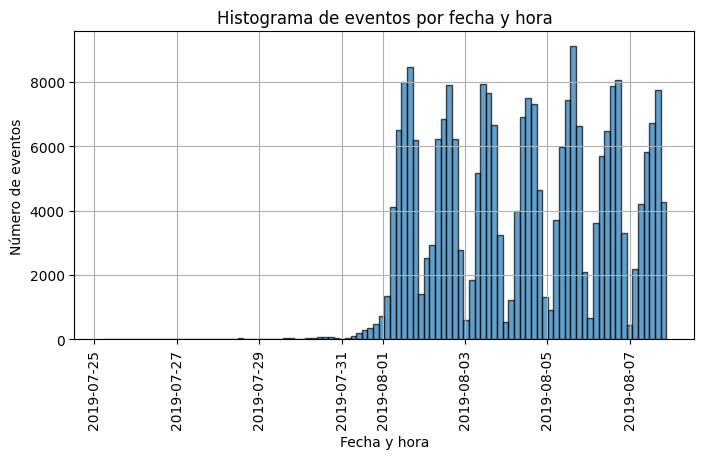

In [8]:
# Encontramos la fecha mínima y máxima
min_date = data['Event_datetime'].min() 
max_date = data['Event_datetime'].max() 

# Trazamos un histograma por fecha y hora
plt.figure(figsize=(8, 4))
data['Event_datetime'].hist(bins=100, alpha=0.7, edgecolor='black')
plt.xlabel('Fecha y hora')
plt.ylabel('Número de eventos')
plt.title('Histograma de eventos por fecha y hora')
plt.xticks(rotation=90)
plt.show()

### ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios o usuarias por razones técnicas y esto podría sesgar el panorama general.

A simple vista en el grafico que se muestra se puede ver que no hay una seguridad de que haya datos igualmente completos para todo el periodo, puesto que los eventos más antiguos podrían terminar en los registros de algunos usuarios o usuarias por razones técnicas y esto podría sesgar el panorama general, es evidente en el grafico que eso pasa. 

### Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?

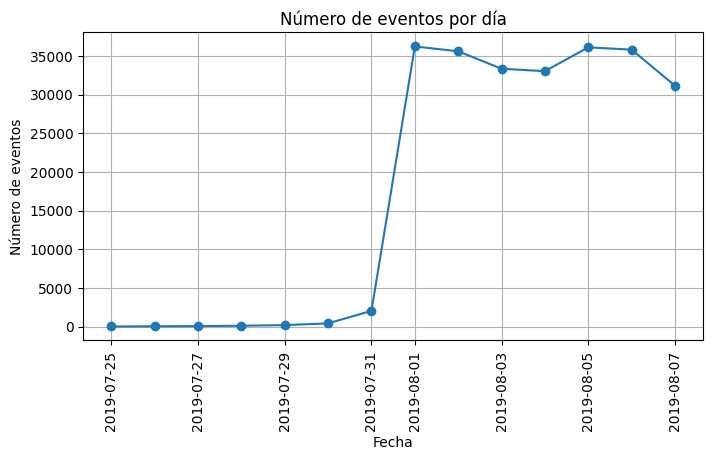

In [9]:
# Contamos el número de eventos por día
events_per_day = data.groupby('Event_date').size()

# Graficamos el número de eventos por día
plt.figure(figsize=(8, 4))
events_per_day.plot(kind='line', marker='o')
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.title('Número de eventos por día')
plt.xticks(rotation=90)
plt.grid()
plt.show()

¿Qué periodo representan realmente los datos?

Como se puede ver en el grafico, podemos ver que el periodo que representa realmente los datos es el comprendido de 2019-07-31 a 2019-08-07, ya que antes de 2019-07-31, los datos no mostraban suficientes eventos como para poder analizar y comprender de la mejor manera el contenido de los datos.

### ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [10]:
# Determinaremos la fecha de inicio con datos consistentes.
consistent_start_date = events_per_day[events_per_day > 1000].index[0]
# Filtraremos el DataFrame para incluir solo eventos desde esa fecha
data_filtered = data[data['Event_date'] >= consistent_start_date]
# Imprimimos la informacion del data filtrado con datos consistentes.
print(data_filtered.info())
#Imprimimos la informacion del data original.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243329 entries, 797 to 244125
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Event_name      243329 non-null  object        
 1   User_Id         243329 non-null  uint64        
 2   Event_datetime  243329 non-null  datetime64[ns]
 3   Group           243329 non-null  category      
 4   Event_date      243329 non-null  object        
dtypes: category(1), datetime64[ns](1), object(2), uint64(1)
memory usage: 9.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Event_name      244126 non-null  object        
 1   User_Id         244126 non-null  uint64        
 2   Event_datetime  244126 non-null  datetime64[ns]
 3   Group           244126 non-null  category      
 

¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

No, en realidad no fueron muchos eventos y usuarios, solo fueron 797 en total. Esto representa una cantidad muy pequeña en comparacion con el numero de datos original de 244,126 que habia en el data original, ya que solo representa el .32% del 100% de los datos totales.

### Asegúrate de tener usuarios y usuarias de los tres grupos experimentales.

In [11]:
# Contamos el número de usuarios en cada grupo
group_counts = data_filtered['Group'].value_counts()

# Imprimimos los resultados
print(group_counts)

248    85473
246    80045
247    77811
Name: Group, dtype: int64


En el resultado anterior podemos ver como es que si hay usuarios y usuarias de los tres grupos experimentales, ademas podemos ver que hay 85473 del grupo 248, 80045 del grupo 246 y 77811 del grupo 247, por lo que inclusive podemos decir que hay una cantidad relativamente equilibrada de usuarios pertenecientes a cada uno de los grupos.

## Paso 4. Estudiar el embudo de eventos


### Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

MainScreenAppear           118681
OffersScreenAppear          46724
CartScreenAppear            42623
PaymentScreenSuccessful     34253
Tutorial                     1048
Name: Event_name, dtype: int64


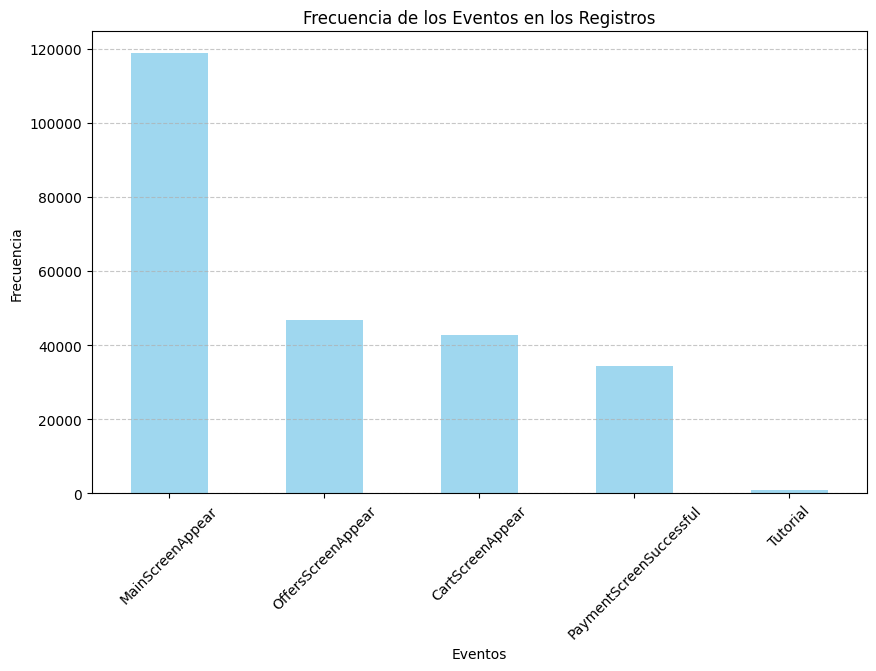

In [12]:
# Contamos la frecuencia de los eventos y los ordenamos por frecuencia
event_counts = data_filtered['Event_name'].value_counts().sort_values(ascending=False)

# Mostramos los resultados
print(event_counts)

# Graficamos los resultados.
event_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', alpha=0.8)
plt.title("Frecuencia de los Eventos en los Registros")
plt.xlabel("Eventos")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

En conclusion podemos observar que hay 5 tipos de eventos, el "MainScreenAppear" con 118681 entradas, siendo este el evento mas comun entre los usuarios y probablemente el evento que representa la entrada principal de los usuarios, en segundo lugar podemos ver que esta el "OffersScreenAppear" con 46724 entradas, en donde podemos observar como es que muchos usuarios ingresaron a ver las ofertas que tiene el sitio después de haber visto la pantalla principal, en tercer lugar se coloca el evento llamado "CartScreenAppear" con 42623 entradas, lo que puede indicar que una gran proporción de los usuarios añaden productos a sus carritos, para posteriormente seguir con el evento ubicado en el cuarto lugar, el cual es el "PaymentScreenSuccessful" con 34253 entradas, este numero representa la cantidad de usuarios que finalizaron satisfactoriamente el proceso de compra, por ultimo tenemos el evento "Tutorial con 1048 entradas, el cual puede estar relacionado con procesos internos del usuario relacionados con la creación de cuentas o bien con el aprendizaje del proceso de compra.

### Encuentra la cantidad de usuarios y usuarias que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios y usuarias. Calcula la proporción de usuarios y usuarias que realizaron la acción al menos una vez.

In [13]:
# Buscamos el numero de usuarios totales en el data_filtered.
total_users = data_filtered['User_Id'].nunique()

#Contamos el numero de usuarios que realizaron cada evento.
users_per_event = data_filtered.groupby('Event_name')['User_Id'].nunique().sort_values(ascending = False)

# Calculamos la proporcion de usuarios y usuarias que realizaron la accion al menos una vez.
proportion_per_event = users_per_event /  total_users

# Mostramos los resultados.
results = pd.DataFrame({
    'Usuarios únicos': users_per_event,
    'Proporción de total_users': proportion_per_event
})
print(results)

                         Usuarios únicos  Proporción de total_users
Event_name                                                         
MainScreenAppear                    7429                   0.985017
OffersScreenAppear                  4606                   0.610713
CartScreenAppear                    3742                   0.496155
PaymentScreenSuccessful             3542                   0.469637
Tutorial                             845                   0.112039


En conclusion podemos ver como es que casi el 100 % de los usuarios visitaron el evento de "MainScreenAppear" con un 98.5017%, lo cual tiene sentido, ya que este evento es el que representa la entrada inicial de usuarios al sistema. 

En segundo lugar, podemos encontrar ep evento "OffersScreenAppear", al cual los usuarios accedieron con un 61.0713% en donde al ser una pagina de ofertas, mas de la mitad de los usuarios visitaron la pagina, mostrando así su interés por conocer las ofertas disponibles.

Después, en tercer lugar tenemos el evento "CartScreenAppear", el cual fue realizado por el 49.6155% de los usuarios, lo que nos puede decir que casi la mitad de todos los usuarios agregaron algún producto a sus carritos de compra.

Posteriormente el 46.9637% de todos los usuarios si compraron algún producto de manera exitosa en el evento llamado "PaymentScreenSuccessful". Este dato es muy relevante, ya que muestra un porcentaje de compra alto, ya que de los usuarios que agregaron un producto a sus carritos de compra casi el 100% logro concretar la compra, con una tasa minima de abandono.

Finalmente, solo el  11.2039% de los usuarios realizaron el evento del "Tutorial", lo que podría indicar que la mayoría de los usuarios no necesito algún tipo de ayuda para poder navegar por el sistema.

### ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

En mi opinion, yo creo que las acciones ocurrieron en el orden que sigue de mayor a menor la proporcion de usuarios que realizaron cada envento, es decir, primero "MainScreenAppear" con una proporcion de 98.5017% de los usuarios que entro en la pagina principal, seguido de un 61.0713% de los usuarios que entro en la pagina "OffersScreenAppear", luego en tercer lugar el 49.6155% de los usuarios entraron en la pagina "CartScreenAppear", para finalmente lograr el pago en la pagina "PaymentScreenSuccessful" con una proporcion de 46.9637% de los usuarios. 

En el caso del evento llamado "Tutorial" el cual el 11.2039% de los usuarios realizaron, podemos ver que es una accion aislada a la secuencia de compra, puesto que puede estar relacionada con una ayuda ofrecida por la pagina para ayudar a los usuarios que necesitaron asistencia con el uso de la pagina de manera indendiente.

### Utiliza el embudo de eventos para encontrar la proporción de usuarios y usuarias que pasan de una etapa a la siguiente. (Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B).

In [14]:
# Ordenamos los eventos en el orden del embudo
results = results.loc[['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']]

# Calculamos las proporciones de paso de una etapa a la siguiente
results['Proporción de paso'] = results['Usuarios únicos'].shift(-1) / results['Usuarios únicos']

# Mostramos el DataFrame con la nueva columna
print(results)

                         Usuarios únicos  Proporción de total_users  \
Event_name                                                            
MainScreenAppear                    7429                   0.985017   
OffersScreenAppear                  4606                   0.610713   
CartScreenAppear                    3742                   0.496155   
PaymentScreenSuccessful             3542                   0.469637   

                         Proporción de paso  
Event_name                                   
MainScreenAppear                   0.620003  
OffersScreenAppear                 0.812419  
CartScreenAppear                   0.946553  
PaymentScreenSuccessful                 NaN  


Como podemos ver en la tabla anterior, la proporcion de paso del evento A (MainScreenAppear) al evento B (OffersScreenAppear) es del 62%, luego del paso del evento B (OffersScreenAppear) al evento C (CartScreenAppear) es del 80.2419% y del evento C (CartScreenAppear) al evento D (PaymentScreenSuccesful) es del 94.6553%. 

Es con base en lo anterior que podemos decir que el momento en el cual la pagina pierde mas usuarios es durante el traslado del evento A al B, ya que solo el 62% de los usuarios permanecen en la pagina despues de ver el evento numero A, perdiendo aproximadamente el 38% de los usuarios.

Sin embargo, despues de haber visto las ofertas en el evento B, la proporcion crece hasta el 81.2419%, casi un 30% mas en comparacion con el recorrido anterior. 

Por ultimo es importante destacar que de los usuarios que llegan al evento numero C (CartScreenAppear) casi el 100% de lo usuarios termina con una compra exitosa en el evento D.

### ¿En qué etapa pierdes más usuarios y usuarias?

En la etapa numero 1, en el transcurso del evento A al B, es decir, de "MainScreenAppear" al evento "OffersScreenAppear", se pierden aproximadamente un 38% de los usuarios y usuarias.

### ¿Qué porcentaje de usuarios y usuarias hace todo el viaje desde su primer evento hasta el pago?

In [15]:
complete_journey = (results.loc['PaymentScreenSuccessful', 'Usuarios únicos']/
                    results.loc['MainScreenAppear', 'Usuarios únicos'])*100
print(complete_journey)

47.6780185758514


El 47.678% de usuarios y usuarias hace todo el viaje desde su primer evento hasta el pago. Este porcentaje refleja casi un 50% de retencion de usuarios y usuarias desde el primer evento.

## Paso 5. Estudiar los resultados del experimento

### ¿Cuántos usuarios y usuarias hay en cada grupo?

In [16]:
#Contamos el numero de usuarios que hay en cada grupo.
users_per_group = data_filtered.groupby('Group')['User_Id'].nunique().sort_values(ascending = False)
print(users_per_group)

Group
248    2540
247    2517
246    2485
Name: User_Id, dtype: int64


Como podemos ver en el resultado anterior, hay 2540 usuarios en el grupo 248, 2517 en el grupo 247 y 2485 en el grupo 246. Del mismo modo es importante destacar que los tres grupos tienen tamaños muy similares, por lo que de esa manera facilita en cierto grado la realizacion de operaciones estadisticas.

### Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

In [17]:
# Filtramos los usuarios por grupo.
users_by_group = data_filtered.groupby('Group')['User_Id'].nunique()
# Filtramos los usuarios que realizaron el evento 'PaymentScreenSuccessful' por grupo.
users_payment_succesful = data_filtered[data_filtered['Event_name'] == 'PaymentScreenSuccessful'].groupby('Group')['User_Id'].nunique()
# Calculamos la tasa de conversion.
conversion_rate = users_payment_succesful / users_by_group
# Extraemos las tasas de conversion de los grupos 246 y 247.
conversion_246 = conversion_rate.loc[246]
conversion_247 = conversion_rate.loc[247]
#Prueba de Mann_Whitney
sample_246 = data_filtered[(data_filtered['Group'] == 246) & (data_filtered['Event_name'] == 'PaymentScreenSuccessful')]['User_Id'].nunique()
sample_247 = data_filtered[(data_filtered['Group'] == 247) & (data_filtered['Event_name'] == 'PaymentScreenSuccessful')]['User_Id'].nunique()


# Prueba de Mann-Whitney
p_value_conversion = stats.mannwhitneyu([sample_246], [sample_247])[1]

# Diferencia relativa.
relative_difference = (conversion_247 - conversion_246) / conversion_246

# Imprimimos resultados de significancia y diferencia relativa
print(f"Valor p de la prueba de Mann-Whitney: {p_value_conversion:.3f}")
print(f"Diferencia relativa: {relative_difference:.3f}")


# Comprobamos la significancia estadistica con un nivel de significancia de 0.001.
print(f"Valor p de la prueba de Mann-Whitney: {p_value_conversion:.3f}")
if p_value_conversion < 0.001:
    print("El resultado es estadísticamente significativo con el nivel de significancia ajustado (α = 0.001).")
else:
    print("No hay diferencia estadísticamente significativa con el nivel de significancia ajustado (α = 0.001).")

Valor p de la prueba de Mann-Whitney: 1.000
Diferencia relativa: -0.046
Valor p de la prueba de Mann-Whitney: 1.000
No hay diferencia estadísticamente significativa con el nivel de significancia ajustado (α = 0.001).


En conclusion podemos observar que no hay una diferencia estadísticamente significativa entre los grupos 246 y 247, debido a que el valor p arrojado por la prueba de Mann-Whitney es de 1.000, lo cual es significativamente mayor que el umbral de 0.001. Lo que puede indicar que cualquiera que sea la diferencia observada, esta puede ser atribuida al azar.

Ademas tambien podemos ver que la diferencia relativa entre los dos grupos es minima, con el grupo 247 mostrando una tasa de conversion 4.6% inferior que el grupo 246. Es por lo anterior que podemos decir que esta diferencia no es suficiente para poder sugerir que alguno de los grupos tiene un desempeño significativamente mejor.

### Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios y usuarias que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?

In [18]:
# Creamos la función para analizar un evento específico en los grupos de control.
def event_analysis(event_name, data_filtered):
    # Filtrar datos solo para los grupos de control 246 y 247
    control_data = data_filtered[data_filtered['Group'].isin([246, 247])]
    
    # Obtenemos el total de usuarios únicos en cada grupo
    total_users_by_group = control_data.groupby('Group')['User_Id'].nunique()
    
    # Obtenemos los usuarios únicos que realizaron el evento en cada grupo
    event_users_by_group = (
        control_data[control_data['Event_name'] == event_name]
        .groupby('Group')['User_Id']
        .nunique()
    )
    
    # Aseguramos que ambos grupos de control estén presentes en event_users_by_group
    event_users_by_group = event_users_by_group.reindex([246, 247], fill_value=0)
    
    # Obtenemos las proporciones
    proportions = event_users_by_group / total_users_by_group.reindex([246, 247], fill_value=0)
    
    # Creamos las muestras para las pruebas de Mann-Whitney
    sample_246 = control_data[
        (control_data['Group'] == 246) & (control_data['Event_name'] == event_name)
    ]['User_Id']
    sample_247 = control_data[
        (control_data['Group'] == 247) & (control_data['Event_name'] == event_name)
    ]['User_Id']
    
    # Realizamos la prueba de Mann-Whitney
    if len(sample_246) > 0 and len(sample_247) > 0:
        p_value = stats.mannwhitneyu(sample_246, sample_247, alternative='two-sided')[1]
    else:
        p_value = None  
    
    # Calculamos la diferencia relativa
    if proportions[246] > 0:
        relative_difference = (proportions[247] - proportions[246]) / proportions[246]
    else:
        relative_difference = None
    
    # Mostramos resultados
    print(f"Evento: {event_name}")
    print(f"Proporciones:\n{proportions}")
    if p_value is not None:
        if p_value < 0.001:
            print(f"Valor p de la prueba de Mann-Whitney: {p_value:.3f} (Significativo con α = 0.001)")
        else:
            print(f"Valor p de la prueba de Mann-Whitney: {p_value:.3f} (No significativo con α = 0.001)")
    else:
        print("No hay suficientes datos para calcular la diferencia relativa.")
    
    
    
# Analizamos el evento más popular 'MainScreenAppear'.
event_analysis('MainScreenAppear', data_filtered)
print('\n')
#Analizamos el evento 'OffersScreenAppear'.
event_analysis('OffersScreenAppear', data_filtered)
print('\n')
#Analizamos el evento 'CartScreenAppear'.
event_analysis('CartScreenAppear', data_filtered) 
print('\n')
# Analizamos el evento 'PaymentScreenSuccessful'.
event_analysis('PaymentScreenSuccessful', data_filtered)

Evento: MainScreenAppear
Proporciones:
Group
246    0.986720
247    0.984903
Name: User_Id, dtype: float64
Valor p de la prueba de Mann-Whitney: 0.000 (Significativo con α = 0.001)


Evento: OffersScreenAppear
Proporciones:
Group
246    0.621328
247    0.606277
Name: User_Id, dtype: float64
Valor p de la prueba de Mann-Whitney: 0.000 (Significativo con α = 0.001)


Evento: CartScreenAppear
Proporciones:
Group
246    0.509859
247    0.492253
Name: User_Id, dtype: float64
Valor p de la prueba de Mann-Whitney: 0.000 (Significativo con α = 0.001)


Evento: PaymentScreenSuccessful
Proporciones:
Group
246    0.482897
247    0.460469
Name: User_Id, dtype: float64
Valor p de la prueba de Mann-Whitney: 0.005 (No significativo con α = 0.001)


En conclusion se puede observar como es que si hay diferencias significativas en el valor p obtenido mediante la prueba de Mann-Whitney, sin embargo, estas diferencias son minimas al ser de -0.2% en el caso del evento "MainScreenAppear", en el caso del evento " OffersScreenAppear", la diferencia fue de -2.4%, en tercer lugar la diferencia fue de -3.5% para el evento "CartScreenAppear", por ultimo en el caso del evento "PaymentScreenSuccessful", la diferencia fue de -4.6%. 

Es por lo anterior que podemos ver que las diferencias entre los grupos de control 246 y 247, que aunque si son significativas en la mayoria de los eventos, con excepcion de "PaymentScreenSuccesful" segun las pruebas de Mann-Whitney, esta son muy pequeñas en terminos practicos.  Lo que puede sugerir que los grupos han sido divididos de manera correcta y que cualquier diferencia puede ser atribuida a las variaciones aleatorias dentro de los datos. En el caso del evento "PaymentScreenSuccesful" podemos ver que las diferencias entre los grupos de control pueden estar relacionadas con factores de azar.

### Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

In [19]:
# Cramos la función para analizar un evento específico en los grupos
def event_analysis(event_name, data_filtered):
    # Filtrar datos solo para los grupos de control 246, 247 y el grupo de prueba 248
    control_data = data_filtered[data_filtered['Group'].isin([246, 247, 248])]
    
    # Obtenemos el total de usuarios únicos en cada grupo
    total_users_by_group = control_data.groupby('Group')['User_Id'].nunique()
    
    # Obtenemos los usuarios únicos que realizaron el evento en cada grupo
    event_users_by_group = (
        control_data[control_data['Event_name'] == event_name]
        .groupby('Group')['User_Id']
        .nunique()
    )
    
    # Aseguramos que los tres grupos estén presentes en event_users_by_group
    event_users_by_group = event_users_by_group.reindex([246, 247, 248], fill_value=0)
    
    # Obtenemos las proporciones
    proportions = event_users_by_group / total_users_by_group.reindex([246, 247, 248], fill_value=0)
    
    # Creamos las muestras para las pruebas de Mann-Whitney
    sample_246 = control_data[
        (control_data['Group'] == 246) & (control_data['Event_name'] == event_name)
    ]['User_Id']
    sample_247 = control_data[
        (control_data['Group'] == 247) & (control_data['Event_name'] == event_name)
    ]['User_Id']
    sample_248 = control_data[
        (control_data['Group'] == 248) & (control_data['Event_name'] == event_name)
    ]['User_Id']
    
    # Realizamos pruebas de Mann-Whitney para comparar 246 vs 247, 246 vs 248, y 247 vs 248
    p_value_246_247 = stats.mannwhitneyu(sample_246, sample_247, alternative='two-sided')[1] if len(sample_246) > 0 and len(sample_247) > 0 else None
    p_value_246_248 = stats.mannwhitneyu(sample_246, sample_248, alternative='two-sided')[1] if len(sample_246) > 0 and len(sample_248) > 0 else None
    p_value_247_248 = stats.mannwhitneyu(sample_247, sample_248, alternative='two-sided')[1] if len(sample_247) > 0 and len(sample_248) > 0 else None
    
    # Calculamos las diferencias relativas
    relative_diff_246_247 = (proportions[247] - proportions[246]) / proportions[246] if proportions[246] > 0 else None
    relative_diff_246_248 = (proportions[248] - proportions[246]) / proportions[246] if proportions[246] > 0 else None
    relative_diff_247_248 = (proportions[248] - proportions[247]) / proportions[247] if proportions[247] > 0 else None
    
    # Mostramos resultados
    print(f"Evento: {event_name}")
    print(f"Proporciones:\n{proportions}")
    if p_value_246_247 is not None:
        if p_value_246_247 < 0.001:
            print(f"Valor p (246 vs 247): {p_value_246_247:.3f} (Significativo con α = 0.001)")
        else:
            print(f"Valor p (246 vs 247): {p_value_246_247:.3f} (No significativo con α = 0.001)")
    if p_value_246_248 is not None:
        if p_value_246_248 < 0.001:
            print(f"Valor p (246 vs 248): {p_value_246_248:.3f} (Significativo con α = 0.001)")
        else:
            print(f"Valor p (246 vs 248): {p_value_246_248:.3f} (No significativo con α = 0.001)")
    if p_value_247_248 is not None:
        if p_value_247_248 < 0.001:
            print(f"Valor p (247 vs 248): {p_value_247_248:.3f} (Significativo con α = 0.001)")
        else:
            print(f"Valor p (247 vs 248): {p_value_247_248:.3f} (No significativo con α = 0.001)")
    print('\n')

# Analizamos los eventos principales
events = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
for event in events:
    event_analysis(event, data_filtered)


Evento: MainScreenAppear
Proporciones:
Group
246    0.986720
247    0.984903
248    0.983465
Name: User_Id, dtype: float64
Valor p (246 vs 247): 0.000 (Significativo con α = 0.001)
Valor p (246 vs 248): 0.164 (No significativo con α = 0.001)
Valor p (247 vs 248): 0.000 (Significativo con α = 0.001)


Evento: OffersScreenAppear
Proporciones:
Group
246    0.621328
247    0.606277
248    0.604724
Name: User_Id, dtype: float64
Valor p (246 vs 247): 0.000 (Significativo con α = 0.001)
Valor p (246 vs 248): 0.000 (Significativo con α = 0.001)
Valor p (247 vs 248): 0.792 (No significativo con α = 0.001)


Evento: CartScreenAppear
Proporciones:
Group
246    0.509859
247    0.492253
248    0.486614
Name: User_Id, dtype: float64
Valor p (246 vs 247): 0.000 (Significativo con α = 0.001)
Valor p (246 vs 248): 0.000 (Significativo con α = 0.001)
Valor p (247 vs 248): 0.035 (No significativo con α = 0.001)


Evento: PaymentScreenSuccessful
Proporciones:
Group
246    0.482897
247    0.460469
248    0

Los resultados sugieren que el grupo 248, con fuentes alteradas, muestra diferencias estadísticamente significativas con los grupos de control en varias etapas.

Ademas, es importante destacar que las diferencias entre 246 y 247 son pequeñas, lo que confirma que los grupos de control fueron divididos correctamente.

Por otro lado, es importante destacar que las diferencias entre 247 y 248 son generalmente menores que las observadas entre 246 y 248, lo cual es consistente con el hecho de que 248 tiene fuentes alteradas.

Esto podría indicar que las alteraciones en las fuentes no tienen un impacto muy marcado en el comportamiento de los usuarios, aunque en etapas específicas como pasa en el caso del evento PaymentScreenSuccessful, el grupo 248 muestra un desempeño ligeramente mejor que el grupo 247.

### ¿Qué nivel de significación has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significación? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

He usado un nivel de significacion de 0.05, o bien de 5%.

He calculado 9 pruebas de hipotesis estadistica.

En mi opinion si cambio el nivel de significacion estadistica a 0.1% las pruebas de Mann-Whitney podrian arrojarme mejores resultados en cuestion de significancia, al ayudarme a eliminar de alguna forma los falsos positivos que podria haber obtenido.